In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

In this assignment you are going to see an interesting thing that you can do with PCA, namely classify and deform shapes. We describe each shape with a set of landmark points, and then treat those points as the data.

The dataset we are going to use is a set of outline contours of leaves. The original images of the leaves, and information about the dataset is available at http://www.cvl.isy.liu.se/en/research/datasets/swedish-leaf/ in case you are interested, but you do not need it.

The dataset we will use (`SwedishLeaves.csv`) is on Blackboard. It consists of the outline contours of the leaves from the webpage above, using 200 points around the outline of each leaf. 

There are 440 contours, and 15 different leaf classes, with around 30 examples of each leaf.

The data matrix is arranged so that each row is a leaf, in order 
- x1, y1, x2, y2, x3, y3, ..., x200, y200, class

The class is a number from 1 to 15. The list of leaf names (in order) is given below. 

Task 1: Load the data, and plot a couple of different leaves in their own figures. Make the title of the figure be the class of the leaf by using the names in the cell below. The output should like my example below (remember that the first class is class 1, not class 0). (5 marks)

In [8]:
names = ['Ulmus Minor', 'Acer Platanoides', 'Ulmus Laevis', 'Quercus Robur', 
         'Betula Pubescens', 'Tilia Platyphyllos', 'Salix Fragilis', 'Populus Tremula', 
         'Ulmus Glabra', 'Sorbus Aucuparia', 'Prunus Padus', 'Tilia Cordata', 'Populus Sp.',
         'Scandosorbus Intermedia', 'Fagus Sylvatica']

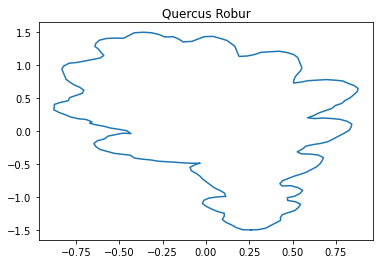

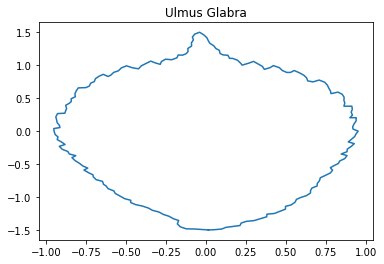

We are going to apply PCA to the dataset in order to reduce the number of dimensions. 

Task 2: Use one of the PCA implementations (either mine or the sklearn one) and make a scree plot of the total explained variance for the first 100 principal components. Use that to decide how many principal components to use. Clearly write the number of PCs you pick, with a reason. (3 marks)

(440, 100)


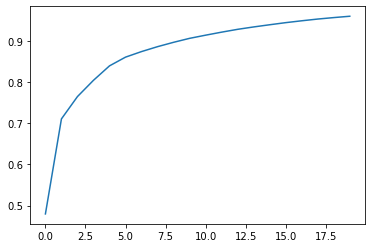

Before we do any more with that, let's see how crazy we can get. 

Task 3: Compute the first two principal components, and plot the points in 2D with a different colour for each class. Comment on the results. (3 marks)

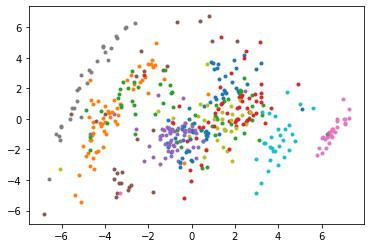

Task 4: Take the PCA transformed data in 2D, 5D, 10D, and 100D and invert the PCA transformation. Plot a few examples for each of those datasets. 
Plot the original shape too. I've made my plots using `fig, axs = pl.subplots(5, 5, sharex=True, sharey=True)` to show the grid and then `axs[i,j].plot()` to plot in the different axes within it. 

Do your observations make you want to change the number of principal components to use?
(5 marks)

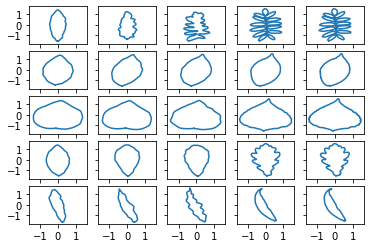

It looks like you do need more -- look at indices 2, 287 and 356

We are now going to look at the effect of the first few principal components. 
Use the 5D PCs. 

Task 5: For classes 2, 7 and 10, compute the mean shape for that class (so find the data rows that correspond to those classes and compute the mean of those datapoints), and then plot that plus and minus 3 standard deviations for each of the 5 PCs. If you use the sklearn implementation of PCA then the components are in `PCA.components_` (4 marks)

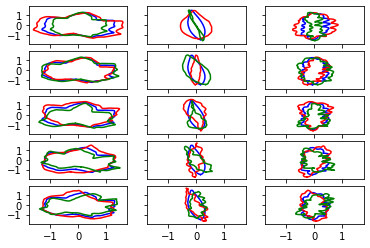

Task 6: Use the Support Vector Machine that you saw with Binh (using `from sklearn.svm import SVC`) to classify the leaves using a training set of 75% of the data and testing on the rest with the 5D dataset. You will need to use the whole classification pipeline. Show the test accuracy and the  confusion matrix and comment on the results. (5 marks)


0.7909090909090909


array([[ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  6,  0,  1,  0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  0,  1,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  6,  0,  0],
       [ 1,  0,  2,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  6,  0,  0

Results are pretty good! Even the errors are into related classes, not random, mostly.